In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs, make_regression, make_low_rank_matrix
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error

In [2]:
m = 10
X,y = make_regression(n_samples=50, n_features=m, n_informative=8, effective_rank=3, tail_strength=0.5)

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [3]:
num_alpha = 10
alpha = np.linspace(0.05,3,num_alpha)

B_r = np.empty((m,num_alpha))
B_l = np.empty((m,num_alpha))
error = np.empty((num_alpha,2))

for i in range(num_alpha):
    ridge = Ridge(alpha[i]).fit(X_train,y_train)
    lasso = Lasso(alpha[i]).fit(X_train,y_train)
    
    B_r[:,i] = ridge.coef_
    B_l[:,i] = lasso.coef_
    
    error[i,0] = mean_absolute_error(y_test,ridge.predict(X_test))
    error[i,1] = mean_absolute_error(y_test,lasso.predict(X_test))

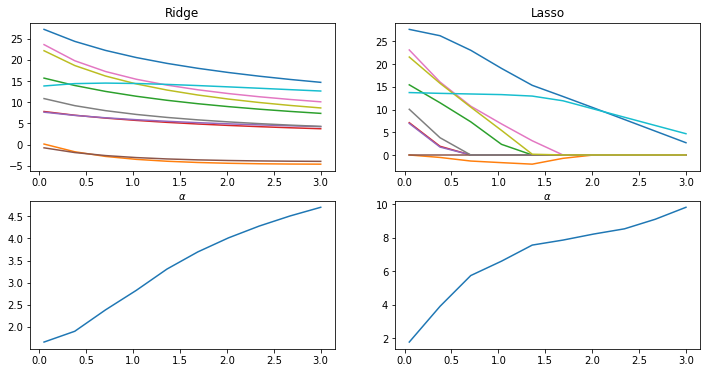

In [4]:
fig, axes = plt.subplots(2,2,figsize=(12,6))
axes = axes.flatten()
axes[0].title.set_text('Ridge')
axes[0].set_xlabel(r'$\alpha$')
for i in range(m):
    axes[0].plot(alpha,B_r[i,:])
axes[2].plot(alpha,error[:,0])
    
axes[1].title.set_text('Lasso')
axes[1].set_xlabel(r'$\alpha$')
for i in range(m):
    axes[1].plot(alpha,B_l[i,:])
axes[3].plot(alpha,error[:,1])
    
    
    

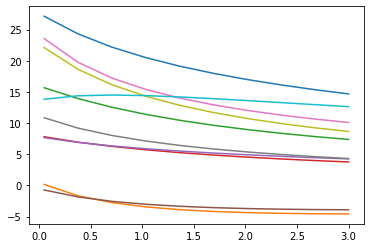

In [5]:
for i in range(m):
    plt.plot(alpha,B_r[i,:])
    

In [6]:
df = pd.read_csv('caschools.csv',index_col=0)
df['str'] = df['students']/df['teachers']
df['score'] = (df['math']+df['read'])/2
df = df.drop(columns=['district','school','grades','county','english','math'])
y = df.pop('score')
X = normalize(df)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_alpha = 10
alpha = np.linspace(0.05,3,num_alpha)
m = X.shape[1]


B_r = np.empty((m,num_alpha))
B_l = np.empty((m,num_alpha))
error = np.empty((num_alpha,2))

for i in range(num_alpha):
    ridge = Ridge(alpha[i]).fit(X_train,y_train)
    lasso = Lasso(alpha[i]).fit(X_train,y_train)
    
    B_r[:,i] = ridge.coef_
    B_l[:,i] = lasso.coef_
    
    error[i,0] = mean_absolute_error(y_test,ridge.predict(X_test))
    error[i,1] = mean_absolute_error(y_test,lasso.predict(X_test))

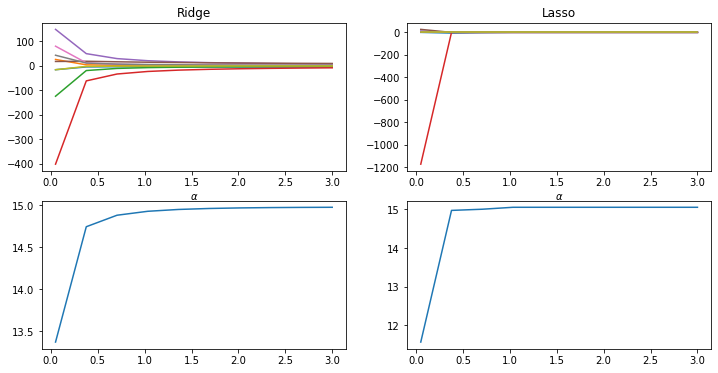

In [8]:
fig, axes = plt.subplots(2,2,figsize=(12,6))
axes = axes.flatten()
axes[0].title.set_text('Ridge')
axes[0].set_xlabel(r'$\alpha$')
for i in range(m):
    axes[0].plot(alpha,B_r[i,:])
axes[2].plot(alpha,error[:,0])
    
axes[1].title.set_text('Lasso')
axes[1].set_xlabel(r'$\alpha$')
for i in range(m):
    axes[1].plot(alpha,B_l[i,:])
axes[3].plot(alpha,error[:,1])
    
    
    

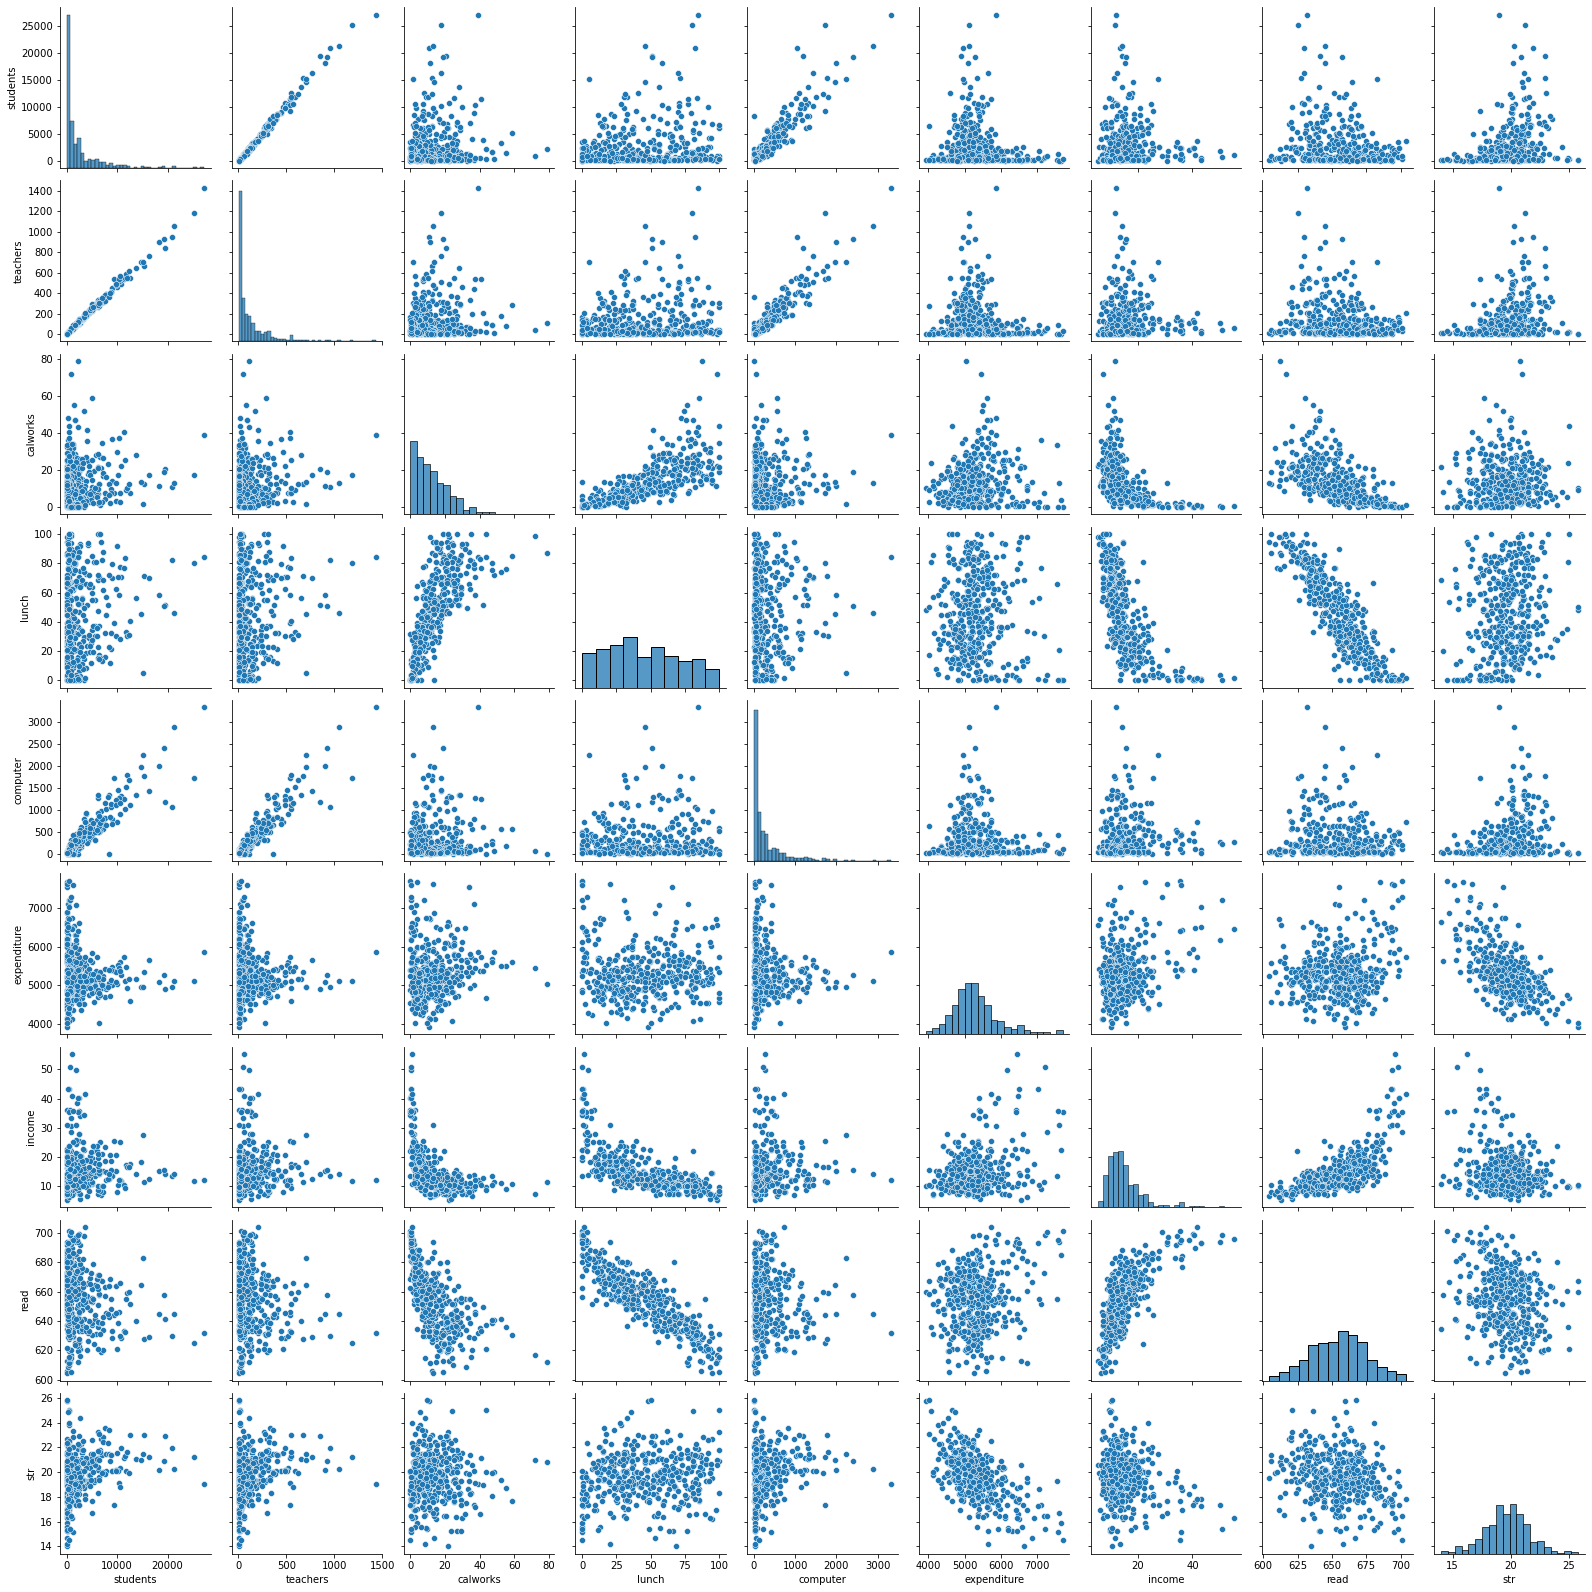

In [9]:
sns.pairplot(df)

jeg synes det er vanskelig med normalisering.

jeg har lyst til å illustrere nivåkurver i optimeringsproblem med ridge og lasso.

jeg har også lyst til å få det med kryssvalidering og score i sklearn litt mer operativt.